### Seaborn with heatmaps

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
oo = pd.read_csv('data/olympics.csv' , skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Using the Olympic dataset, present a summary of the medals won by participationg countries in the 2008 Olympics.


In [4]:
lo = oo[oo.Edition == 2008]
lo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [7]:
grouped=lo.groupby(['NOC', 'Medal']).size()
grouped

NOC  Medal 
AFG  Bronze     1
ALG  Bronze     1
     Silver     1
ARG  Bronze    31
     Gold      20
               ..
UZB  Silver     2
VEN  Bronze     1
VIE  Silver     1
ZIM  Gold       1
     Silver     3
Length: 188, dtype: int64

In [18]:
stack = grouped.unstack('Medal', fill_value=0)
sort_stack = stack.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']]
sort_stack

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26
...,...,...,...
ISR,0,0,1
MDA,0,0,1
MRI,0,0,1


<AxesSubplot:xlabel='Medal', ylabel='NOC'>

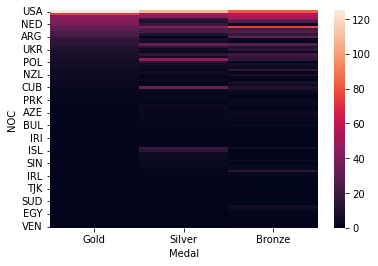

In [19]:
sns.heatmap(sort_stack)

In [22]:
sort_stack = sort_stack.transpose()
sort_stack

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


<AxesSubplot:xlabel='NOC', ylabel='Medal'>

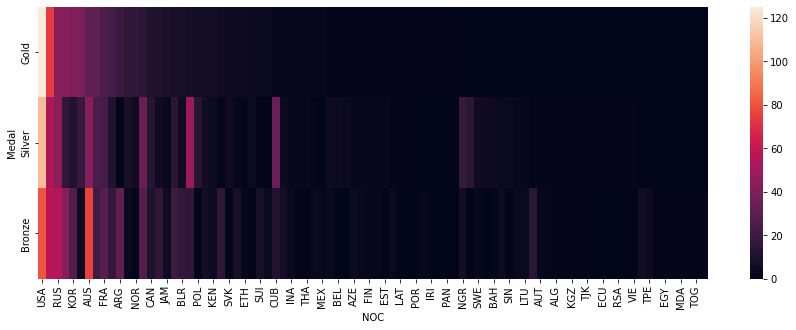

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(sort_stack)

## Creating your own colormaps

In [34]:
from matplotlib.colors import ListedColormap

In [35]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Challenge

### In every Olympics, which US athelet has won the most total number of medals? Include the athetes's displine

In [38]:
gy = oo[oo.NOC =='USA']
gy

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29098,Beijing,2008,Volleyball,Volleyball,"TOM, Logan",USA,Women,volleyball,W,Silver
29099,Beijing,2008,Volleyball,Volleyball,"WILLOUGHBY, Kim",USA,Women,volleyball,W,Silver
29151,Beijing,2008,Wrestling,Wrestling Free.,"CEJUDO, Henry",USA,Men,- 55kg,M,Gold
29161,Beijing,2008,Wrestling,Wrestling Free.,"MILLER, Randi",USA,Women,55 - 63kg,W,Bronze


In [59]:
grouped =gy.groupby(['Edition', 'Athlete', 'Medal']).size()
grouped

Edition  Athlete          Medal 
1896     BLAKE, Arthur    Silver    1
         BURKE, Thomas    Gold      2
         CLARK, Ellery    Gold      2
         CONNOLLY, James  Bronze    1
                          Gold      1
                                   ..
2008     WINDES, Elsie    Silver    1
         WINEBERG, Mary   Gold      1
         WRIGHT, Adam     Silver    1
         ZAGUNIS, Mariel  Bronze    1
                          Gold      1
Length: 3921, dtype: int64

In [60]:
grouped = grouped.unstack('Medal', fill_value=0)

In [61]:
# create new column 
grouped['Total'] = grouped['Gold']+ grouped['Silver']+ grouped['Bronze']
grouped

Medal                    Bronze  Gold  Silver  Total
Edition Athlete                                     
1896    BLAKE, Arthur         0     0       1      1
        BURKE, Thomas         0     2       0      2
        CLARK, Ellery         0     2       0      2
        CONNOLLY, James       1     1       1      3
        CURTIS, Thomas        0     1       0      1
...                         ...   ...     ...    ...
2008    WILLOUGHBY, Kim       0     0       1      1
        WINDES, Elsie         0     0       1      1
        WINEBERG, Mary        0     1       0      1
        WRIGHT, Adam          0     0       1      1
        ZAGUNIS, Mariel       1     1       0      2

[3549 rows x 4 columns]

In [62]:
grouped.reset_index(inplace=True)
grouped

Medal,Edition,Athlete,Bronze,Gold,Silver,Total
0,1896,"BLAKE, Arthur",0,0,1,1
1,1896,"BURKE, Thomas",0,2,0,2
2,1896,"CLARK, Ellery",0,2,0,2
3,1896,"CONNOLLY, James",1,1,1,3
4,1896,"CURTIS, Thomas",0,1,0,1
...,...,...,...,...,...,...
3544,2008,"WILLOUGHBY, Kim",0,0,1,1
3545,2008,"WINDES, Elsie",0,0,1,1
3546,2008,"WINEBERG, Mary",0,1,0,1
3547,2008,"WRIGHT, Adam",0,0,1,1


In [63]:
for year, group in grouped.groupby('Edition'):
    tu= group.sort_values('Total', ascending=False)[:1]
    print(tu)

Medal  Edition          Athlete  Bronze  Gold  Silver  Total
5         1896  GARRETT, Robert       0     2       2      4
Medal  Edition         Athlete  Bronze  Gold  Silver  Total
14        1900  BAXTER, Irving       0     2       3      5
Medal  Edition       Athlete  Bronze  Gold  Silver  Total
153       1904  HEIDA, Anton       0     5       1      6
Medal  Edition           Athlete  Bronze  Gold  Silver  Total
363       1908  SHERIDAN, Martin       1     2       0      3
Medal  Edition                Athlete  Bronze  Gold  Silver  Total
421       1912  OSBURN, Carl Townsend       1     1       2      4
Medal  Edition      Athlete  Bronze  Gold  Silver  Total
506       1920  LEE, Willis       1     5       1      7
Medal  Edition              Athlete  Bronze  Gold  Silver  Total
733       1924  WEISSMULLER, Johnny       1     3       0      4
Medal  Edition                 Athlete  Bronze  Gold  Silver  Total
800       1928  OSIPOWICH, Albina Lucy       0     2       0      2
Meda